<a href="https://colab.research.google.com/github/ShaswataKOD/DATA-PROJECTS/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install opendatasets
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/dnkumars/industrial-equipment-monitoring-dataset"
od.download(dataset_url)

import os
print(os.listdir("/content/"))
dataset_path = "/content/industrial-equipment-monitoring-dataset"  # Change if needed
print(os.listdir(dataset_path))




Skipping, found downloaded files in "./industrial-equipment-monitoring-dataset" (use force=True to force download)
['.config', 'industrial-equipment-monitoring-dataset', 'sample_data']
['equipment_anomaly_data.csv']


In [ ]:
df = pd.read_csv("/content/industrial-equipment-monitoring-dataset/equipment_anomaly_data.csv")
df.head(5)

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0.0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0.0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0.0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0.0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0.0


# Checking for data cleaning issues
1. No inconsistencies
2. No Structural issues
3. Check for dirty data

In [ ]:
df.columns

Index(['temperature', 'pressure', 'vibration', 'humidity', 'equipment',
       'location', 'faulty'],
      dtype='object')

In [ ]:
# #no need of faulty column

# df.drop(columns=['faulty'],inplace=True)
# df.head()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


In [ ]:
df.shape

(7672, 7)

In [ ]:
cat_col = df.astype('object').columns
cat_col

Index(['temperature', 'pressure', 'vibration', 'humidity', 'equipment',
       'location', 'faulty'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   float64
dtypes: float64(5), object(2)
memory usage: 419.7+ KB


In [ ]:
cat_cols =  df.select_dtypes(include='object').columns.tolist()

In [ ]:
num_cols =  df.select_dtypes(exclude='object').columns.tolist()


In [ ]:
#read and preprocess the dataset
df.isnull().sum()

,0
temperature,0
pressure,0
vibration,0
humidity,0
equipment,0
location,0
faulty,0


In [ ]:
#checking for class imbalances
df['faulty'].value_counts()


,count
faulty,
0.0,6905
1.0,767


## There is no need for feature engineering till now so we are doung EDA

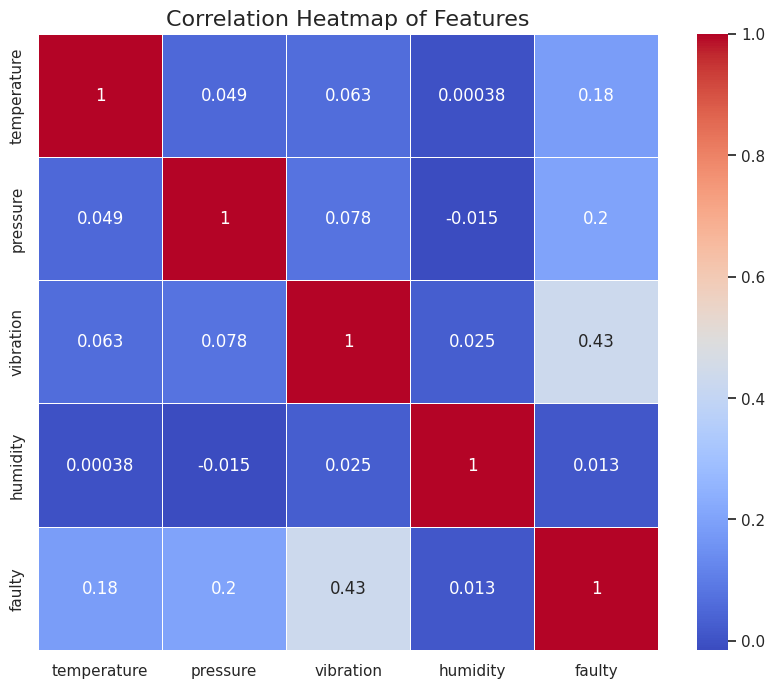

In [ ]:
# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()


#there is not highly correlated features that can affect the anomaly of others


📌 Outlier Detection Report (IQR Method):
--------------------------------------------------
📊 Column: temperature
   - Outliers: 462 (6.02%)
   - IQR Range: (40.59, 99.76)

📊 Column: pressure
   - Outliers: 310 (4.04%)
   - IQR Range: (11.97, 58.67)

📊 Column: vibration
   - Outliers: 327 (4.26%)
   - IQR Range: (0.04, 3.06)

📊 Column: humidity
   - Outliers: 211 (2.75%)
   - IQR Range: (20.52, 79.43)

📊 Column: faulty
   - Outliers: 767 (10.0%)
   - IQR Range: (0.00, 0.00)


🔍 Summary Report:
{'faulty': {'Outlier Count': np.int64(767), 'Outlier Percentage': '10.0 %'},
 'humidity': {'Outlier Count': np.int64(211), 'Outlier Percentage': '2.75 %'},
 'pressure': {'Outlier Count': np.int64(310), 'Outlier Percentage': '4.04 %'},
 'temperature': {'Outlier Count': np.int64(462),
                 'Outlier Percentage': '6.02 %'},
 'vibration': {'Outlier Count': np.int64(327), 'Outlier Percentage': '4.26 %'}}


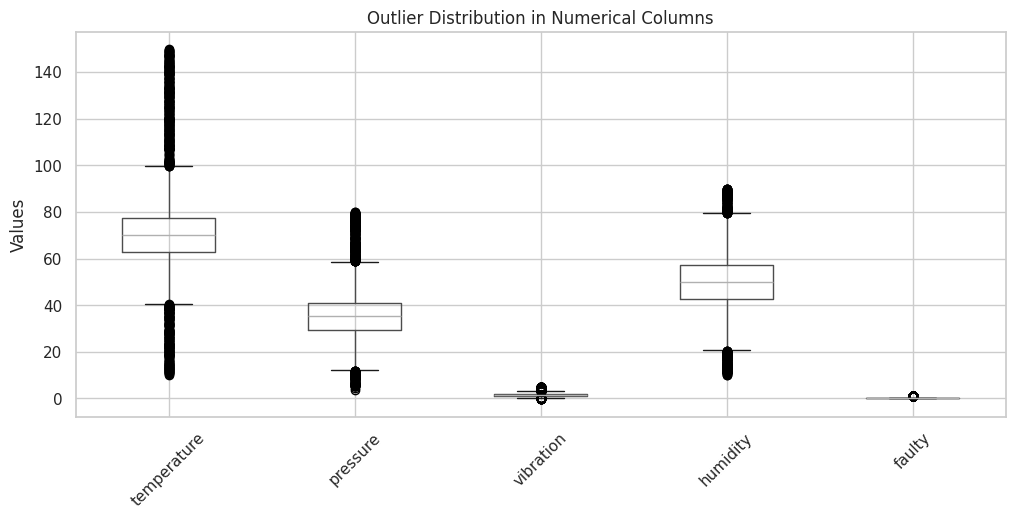

In [ ]:
# @title Default title text
#outlier detection

import pandas as pd
import matplotlib.pyplot as plt
import pprint

def quantify_outliers(df, columns):
    """
    Identifies and quantifies outliers in the given numerical columns using the IQR method.

    Parameters:
        df (pd.DataFrame): The dataset
        columns (list): List of numerical columns to check for outliers

    Returns:
        dict: A dictionary containing the count and percentage of outliers for each column
    """

    outlier_counts = {}

    print("\n📌 Outlier Detection Report (IQR Method):\n" + "-"*50)

    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1, Q3 = df[col].quantile([0.25, 0.75])

        # Calculate IQR
        IQR = Q3 - Q1

        # Calculate the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers
        outlier_mask = (df[col] < lower_bound) | (df[col] > upper_bound)
        outlier_count = outlier_mask.sum()
        outlier_percentage = round((outlier_count / len(df)) * 100, 2)

        # Store results
        outlier_counts[col] = {
            'Outlier Count': outlier_count,
            'Outlier Percentage': f"{outlier_percentage} %"
        }

        # Print summary for better readability
        print(f"📊 Column: {col}")
        print(f"   - Outliers: {outlier_count} ({outlier_percentage}%)")
        print(f"   - IQR Range: ({lower_bound:.2f}, {upper_bound:.2f})\n")

    return outlier_counts

# Get the outlier report
outlier_report = quantify_outliers(df, num_cols)

# Display the report in a structured way
print("\n🔍 Summary Report:")
pprint.pprint(outlier_report)

# Plot outlier distributions for better visualization
plt.figure(figsize=(12, 5))
df[num_cols].boxplot(rot=45)
plt.title("Outlier Distribution in Numerical Columns")
plt.ylabel("Values")
plt.show()


In [ ]:
#One Hot encoding of categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

# Perform one-hot encoding
encoded_data = encoder.fit_transform(df[cat_cols])

# Convert numpy array to DataFrame with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))

# Concatenate the encoded columns to the original DataFrame
df = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)


In [ ]:
df.head(5)

,temperature,pressure,vibration,humidity,faulty,equipment_Compressor,equipment_Pump,equipment_Turbine,location_Atlanta,location_Chicago,location_Houston,location_New York,location_San Francisco,Anomaly
0,0.343641,0.280705,0.190950,0.444779,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1
1,0.469594,0.253494,0.510504,0.396797,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.438164,0.310174,0.335390,0.611001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.440017,0.375289,0.405792,0.380471,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
4,0.403364,0.545147,0.142762,0.414177,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


## Model Bulding

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_recall_curve, auc

# Load Data (Assuming df is already loaded)
features = ['temperature', 'pressure', 'vibration', 'humidity']

# MinMax Scaling (scales features between 0 and 1)
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# ------------------------- Isolation Forest -------------------------
iso_forest = IsolationForest(contamination=0.1, n_estimators=200, random_state=42)
iso_preds = iso_forest.fit_predict(df_scaled)  # -1 = anomaly, 1 = normal
iso_scores = iso_forest.decision_function(df_scaled)

df['Anomaly_IF'] = iso_preds

# ------------------------- One-Class SVM -------------------------
oc_svm = OneClassSVM(kernel="rbf", gamma="auto", nu=0.1)
oc_preds = oc_svm.fit_predict(df_scaled)  # -1 = anomaly, 1 = normal
oc_scores = oc_svm.decision_function(df_scaled)

df['Anomaly_SVM'] = oc_preds

# ------------------------- Local Outlier Factor (LOF) -------------------------
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof_preds = lof.fit_predict(df_scaled)  # -1 = anomaly, 1 = normal
lof_scores = lof.negative_outlier_factor_  # LOF gives negative scores, higher = more normal

df['Anomaly_LOF'] = lof_preds

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temperature             7672 non-null   float64
 1   pressure                7672 non-null   float64
 2   vibration               7672 non-null   float64
 3   humidity                7672 non-null   float64
 4   faulty                  7672 non-null   float64
 5   equipment_Compressor    7672 non-null   float64
 6   equipment_Pump          7672 non-null   float64
 7   equipment_Turbine       7672 non-null   float64
 8   location_Atlanta        7672 non-null   float64
 9   location_Chicago        7672 non-null   float64
 10  location_Houston        7672 non-null   float64
 11  location_New York       7672 non-null   float64
 12  location_San Francisco  7672 non-null   float64
 13  Anomaly                 7672 non-null   int64  
 14  Anomaly_IF              7672 non-null   

## Model Testing

Anomaly Counts:
Anomaly_IF_Binary     768
Anomaly_SVM_Binary    767
Anomaly_LOF_Binary    768
dtype: int64

Consensus Analysis (Agreement between models):
Anomaly_Consensus
0    6495
1     355
2     518
3     304
Name: count, dtype: int64


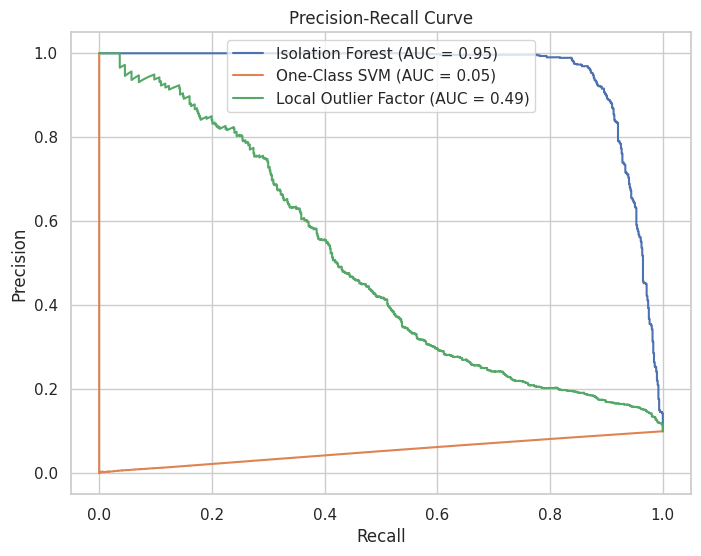


Classification Report:
Anomaly_IF_Binary -> Precision: 0.898, Recall: 0.900, F1-Score: 0.899
Anomaly_SVM_Binary -> Precision: 0.815, Recall: 0.815, F1-Score: 0.815
Anomaly_LOF_Binary -> Precision: 0.458, Recall: 0.459, F1-Score: 0.459


In [ ]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

# Convert anomaly predictions to binary labels (1 = anomaly, 0 = normal)
df['Anomaly_IF_Binary'] = (df['Anomaly_IF'] == -1).astype(int)
df['Anomaly_SVM_Binary'] = (df['Anomaly_SVM'] == -1).astype(int)
df['Anomaly_LOF_Binary'] = (df['Anomaly_LOF'] == -1).astype(int)

# Count anomalies detected by each model
print("Anomaly Counts:")
print(df[['Anomaly_IF_Binary', 'Anomaly_SVM_Binary', 'Anomaly_LOF_Binary']].sum())

# Check overlap (how many anomalies are detected by all three models)
df['Anomaly_Consensus'] = df[['Anomaly_IF_Binary', 'Anomaly_SVM_Binary', 'Anomaly_LOF_Binary']].sum(axis=1)
consensus_counts = df['Anomaly_Consensus'].value_counts().sort_index()

print("\nConsensus Analysis (Agreement between models):")
print(consensus_counts)

# ------------------------- Precision-Recall Curve -------------------------
def plot_precision_recall(y_true, scores, model_name):
    precision, recall, _ = precision_recall_curve(y_true, scores)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f"{model_name} (AUC = {pr_auc:.2f})")

plt.figure(figsize=(8, 6))
y_true = (df['faulty'] == 1).astype(int)  # Assuming 'faulty' column is ground truth

plot_precision_recall(y_true, -iso_scores, "Isolation Forest")  # Lower scores = more anomalous
plot_precision_recall(y_true, oc_scores, "One-Class SVM")
plot_precision_recall(y_true, -lof_scores, "Local Outlier Factor")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# ------------------------- Performance Metrics -------------------------
print("\nClassification Report:")
for model in ['Anomaly_IF_Binary', 'Anomaly_SVM_Binary', 'Anomaly_LOF_Binary']:
    precision, recall, fscore, _ = precision_recall_fscore_support(y_true, df[model], average="binary")
    print(f"{model} -> Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {fscore:.3f}")


## Testing model for accuracy

In [ ]:
import numpy as np

# Example new data point (temperature, pressure, vibration, humidity)
new_data = np.array([[50, 5.5, 0.3, 80]])  # Replace with real values

# Scale the new data point using the same scaler
new_data_scaled = scaler.transform(new_data)

# Predict anomaly using Isolation Forest
iso_pred = iso_forest.predict(new_data_scaled)  # Output: -1 (anomaly) or 1 (normal)
iso_score = iso_forest.decision_function(new_data_scaled)  # Anomaly score

# Predict anomaly using Local Outlier Factor (LOF)
lof_pred = lof.fit_predict(np.vstack([df_scaled, new_data_scaled]))[-1]  # Only last point's prediction
lof_score = lof.negative_outlier_factor_[-1]  # LOF anomaly score for new data

# Print results
print(f"Isolation Forest Prediction: {'Anomaly' if iso_pred[0] == -1 else 'Normal'} (Score: {iso_score[0]:.4f})")
print(f"Local Outlier Factor Prediction: {'Anomaly' if lof_pred == -1 else 'Normal'} (Score: {lof_score:.4f})")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Isolation Forest Prediction: Anomaly (Score: -0.2075)
Local Outlier Factor Prediction: Anomaly (Score: -283.9233)
